In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version =1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X,y = mnist["data"], mnist["target"]

In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

In [5]:
# printing just one row or image of the data set and then getting its label given in dataset
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = "binary")
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
y[0]

'5'

In [7]:
# as the label is string, typecasting it to integer
import numpy as np
y = y.astype(np.uint8)

In [8]:
#Splitting dataset, mnist is already shuffled data that means every fold in validation will have all kinds of labels
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
#Creating a binary classifier to classify images as 5 or not 5
y_train_5 = (y_train==5) # true in rows where y =5 and false for others
y_test_5 = (y_test==5)

In [14]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
sgd_clf.predict([some_digit])

array([False])

In [16]:
#It is currently predciting it wrong.
#Evaluating model using k fold cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv =3, scoring ='accuracy')

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been 

array([0.9532 , 0.95125, 0.9625 ])

In [17]:
#Creating a dumb classifier which classifies every character as not 5
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype =bool)   

In [18]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,X_train, y_train_5, cv=3, scoring ='accuracy')

array([0.91125, 0.90855, 0.90915])

In [19]:
#More than 90% accuracy for model which always classifies digits as not 5. it is because data is skewed.
#We have more data of class not 5 than class 5.
#Much better way of evaluating model for this kind of problem is Confusion matrix.
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been 

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52992,  1587],
       [ 1074,  4347]], dtype=int64)

In [21]:
#if the classifier was perfect, that means the predcitions were same as the actual labels for all
y_train_perfect_pred = y_train_5
confusion_matrix(y_train_perfect_pred, y_train_5)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [22]:
#Precision & recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.7325581395348837

In [23]:
recall_score(y_train_5, y_train_pred)

0.8018815716657444

In [24]:
#F1 score
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.765653896961691

In [25]:
#Sklearn does not let us decide the threshold directly to classif, but it gives access to decisions cores that it uses
#to make predictions. Instead of calling classifier's predict() method, we can call decision_function() method, which
#returns score for an instance, and then use any threshold we want to make predictions based on thsoe scores.
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-45148.19955869])

In [26]:
#As it is predicting the random_digit as already incorreclty(not 5), the sc ores are negative. SO, if we set the score
# as -50000, it will predict as 5.
threshold = -50000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [27]:
#Now if we raise the threshold, we will see the change in behaviour.
threshold = 5000
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [28]:
#This means raising the threshold decreases the recall and increases the precision. To find the appropriate threshold,
# we use the cross_val_predict() functions to get the scores of all instances of training set, this time, we specify
# that we want to return decision scores instead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been 

In [29]:
# with these scores, we use the precision_recall_curve() function to compute precision and recall for al possible
#thresholds.
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

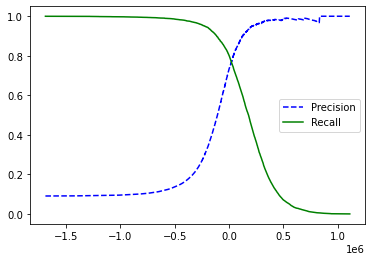

In [30]:
#using Matplotlib to plot precision and recalls as functions of threshold value
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label ="Precision")
    plt.plot(thresholds, recalls[:-1], "g", label="Recall")
    plt.legend()
#using function
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [31]:
y_scores

array([ 130454.39322866, -292310.89416081, -851504.62149277, ...,
        361078.59565149, -432547.19353153, -420755.44332381])

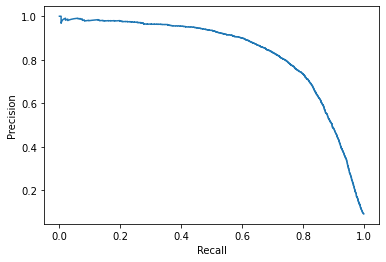

In [32]:
#Based on the above curve project requirements, we can select the threshold to keep the precision recall as per us.
#Another way to select recall and precision trade off is to plot precision vs recall curve.
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [33]:
#If, we have certain requirement that we want precision to be 90%, we can look up the threshold curve and decide.
#More accurate threshold can be given by using the lowest threshold that gives at least 90% precision. 
#np.argmax() will give the first index of the maximum value, which in our case means the first True value.
threshold_90_precision = thresholds[np.argmax(precisions >=0.90)]
#To make the predictions on the training set, we can use the code as:
y_train_pred_90 = (y_scores >=threshold_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9

In [34]:
recall_score(y_train_5, y_train_pred_90)

0.5993359158826784

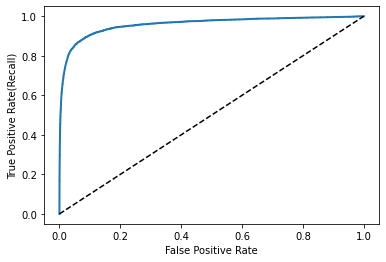

In [35]:
#Selecting the model based on the Receiver operating characterstic (ROC) curve. ROC is plot between 
#Recall (True postivity rate) or sensitivity versus the Faple positive rate (1-TNR)or (1-specificity).
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
#plotting curve
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')#Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate(Recall)')
plot_roc_curve(fpr,tpr)
plt.show()
    

In [36]:
#There is trade off, Higher the TPR, the more False positives the classifier produces. The dotted line represents the
#ROC curve of a purely random classifier. Target is to stay as much away from it(owards tope left corner).
#One way to compare classifier is to use Area under the curve(AUC). A perfect classifier has AUC as 1., whereas
#purelty random classifier has AUC as 0.5. To calculate the AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9584692857783504

In [37]:
#When we have skewed dat6a, like we have very few 5 and more non 5 digits, we prefer to sue Precision Recall curve.
#We use ROC after we have confirmed with PR curve and when data is not skewed.
#Lets see the ROC and AUC for the RandomForestCLassifier and then compare it to those of SGDClassifier.
#Instead of decision_functiosn method, the RandomFOrestCLassifier has predic_proba() method. It returns an array
#containing row per instance and column per given class, each containing the probability that the given instance
#belongs to the class.
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf,X_train, y_train_5, cv=3,method ="predict_proba")

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
#The roc_curve() function expects labels and scores, but instead we can give it probabilities. Let's use the
#positive class's probability as score:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

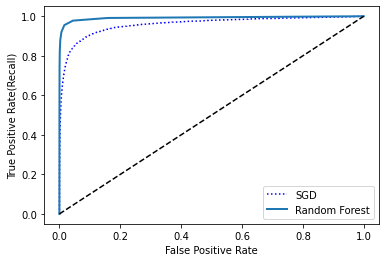

In [39]:
#Plotting the ROC curve as
plt.plot(fpr,tpr,"b:", label ="SGD")
plot_roc_curve(fpr_forest, tpr_forest,"Random Forest")
plt.legend (loc="lower right")
plt.show()

In [40]:
#As we can see, the RandomForestCLassifier is better than SGDClassifier as it has curve to tope left corner and 
# has more AUC. Calculating the AUC scire of RandomForestClassifier as:
roc_auc_score(y_train_5, y_scores_forest)

0.9920527492698306

In [38]:
#Multiclass Classification: Classifiers such as SGD classifier, Random forest classifier, Naive Bayes classifiers 
#are capable of handling multiple classes. Few classifiers such as Logistic Regression, SVM classifiers are strictly 
#binary classifiers. We can use the binary classifiers for multiclass classification by using one vs rest (OvR) and 
#One vs One (OvO) strategy, Skleasrn detects when we try to use binary classifiers for multiclass classification.
#It automatically runs OvR or OvO, based on the algorithm. We will sue SVM to do Multiclass classification on mnist:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) # We have it as y_train not the y_train_5 as we are now considering all digits.
svm_clf.predict([some_digit])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([5], dtype=uint8)

In [1]:
#To see the predictions score of 5 using this classifier, we use the decision_function. It returns the score for
#each class.
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

NameError: name 'svm_clf' is not defined

In [2]:
#The highest score is corrsponding to the class 5.
np.argmax(some_digit_scores)

NameError: name 'np' is not defined

In [3]:
#To see the classes of svm classifier
svm_clf.classes_

NameError: name 'svm_clf' is not defined

In [ ]:
#When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value.
#In this cases, the index of class matches with the class in the classes_ array. It is not always the case.
# So, we need to check what class this array index 5 is referring to.
svm_classes_[5]

In [ ]:
#We can use OnevsRest & OnevsOne through sklearn explicitly by using OneVsOneClassifier or OneVsRestClassifier classes.
#We are using OvR strategy on SVC for multiclass classifier.
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning

In [ ]:
#to check the number of classes
len(ovr_clf.estimators_)

In [11]:
#Training an SGDClassifier is simple for multiclass and sklearn doesn't have to run OvR or OvO as SGDClassifier can
#directly classify instances into multiple classes.
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5], dtype=uint8)

In [12]:
#To see the score per class we can use the decision_function:
sgd_clf.decision_function([some_digit])

array([[-433195.51807197, -338154.39320296, -233775.78280018,
         -96549.33208399, -775699.13613034,  -45148.19955869,
        -536304.97603686, -298210.05377635, -535633.57179217,
        -490653.60782097]])

In [14]:
#We can use the cross vaidation to evaluate this classifier:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring ="accuracy")

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been 

array([0.86872625, 0.87639382, 0.87848177])

In [15]:
#We can increase the performance by scaling the inputs ans then evaluating again using cross val.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf,X_train_scaled, y_train, cv =3, scoring ="accuracy")

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been 

array([0.90736853, 0.90884544, 0.91363705])

In [16]:
#Error Analysis. Now we have chosed SGDClassifier as the best model for our data. We are assuming that we have done the
#hyperparameter tuning using GridSearchCV. Now we will see how the model works by using the cross_val_predict and 
#Confusion matrix.
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been 

array([[5726,    2,   26,   12,   11,   47,   47,    9,   39,    4],
       [   1, 6479,   42,   33,    8,   39,    8,    9,  113,   10],
       [  55,   35, 5319,  104,   79,   20,  106,   51,  174,   15],
       [  45,   40,  145, 5372,    3,  210,   33,   50,  135,   98],
       [  17,   26,   38,    8, 5361,    5,   57,   31,   86,  213],
       [  74,   38,   43,  199,   71, 4584,  116,   26,  175,   95],
       [  33,   22,   43,    2,   42,   90, 5640,    3,   43,    0],
       [  24,   23,   73,   29,   60,   12,    4, 5774,   18,  248],
       [  49,  165,   73,  150,   16,  153,   50,   24, 5038,  133],
       [  39,   31,   26,   92,  163,   35,    3,  177,   79, 5304]],
      dtype=int64)

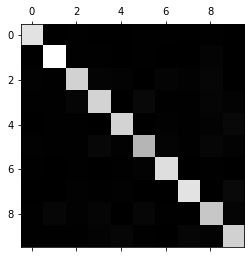

In [17]:
#It is a matrix of numbers. For better understandning, we will see it in graphical form.
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

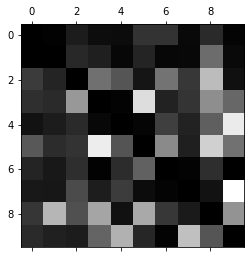

In [19]:
#We can see that the most of the whites are along the diagonal so the prediction is good. The cell of 5 is little gray
#than other cells. It means that the prediction of 5 is not so good. It has many misclassifications in case of 5.
#Now, we will divide the each value in confusion matrix by the number of images in corresponding class, so that we can
#get the error rate and not the absolute error.Absolute error makes abundant classes look unfairly bad.
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx= conf_mx/row_sums
#Filling the diagonals with zeros to keep only the errors and plot result:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

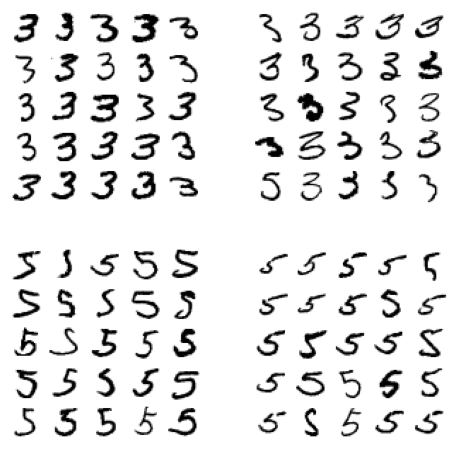

In [23]:
#As we can see, the classifier is predicting 4s as 9, 7s as 9, 5 as 8. Also, there are lot of misclassification between
# 3 and 5. Wecan see the cells are almost white for them. The 5s are gtting classified as 3, and vice-versa.
# To resolve errors like this, we can preprocess images, add more images in training set, add more features, etc.
#Let's try to analyze the errors of 3s to5 and vice versa.
cl_a, cl_b = 3,5
X_aa=X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_ab=X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b)&(y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b)&(y_train_pred==cl_b)]

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

In [24]:
#In the above image, we can see the 5 misclassifies as 3 in top right matrix, 3 misclassified as 5 in bottom left.
#This is happening because we have used a SGDClassifier which is a liner model. It assigns the weight per class to each
#pixel, and when nit sees new instance, it just sums up the weighted pixel intensity and then assign it to the class.
#As 3&5, 4&9, 7&9 differ only by few pixels, the misclassification happens.

In [11]:
#Multilabel Classification.
#When an instance can be assignrd to multiple classes. Like a photo which has multiple persons in it. So that photo
#will be assigned to multiple persons. Suppose, we have created a classifier which tags a photo for 3 persons A,B & C.
#If a photo contains only A & C then the tagging of that photo should be [1 0 1]. Such classification that outputs
#multiple binary tags is called multilabel classification. Instead of photo, lets have simple algo as:
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train >=7)
y_train_odd = (y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
#We have created a classifier which tags a digit if it is among 7.8.9 or it is an odd number. So we will have an
#output as [True True] or [False True] or [True False] or [False False] based on the digit. It is two label multilabel
#classifier. Let's make a prediction.
knn_clf.predict([some_digit])

array([[False,  True]])

In [32]:
#It is working fine as 5 is not larger than 7 and it is odd. We can evaluate the multilabel classifier in many ways.
#One way is to compute F2 score for each abel and then compute the average of both the scores.
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)


NameError: name 'f1_score' is not defined

In [33]:
from sklearn.metrics import f1_score
f1_score(y_multilabel, y_train_knn_pred, average ="macro")

0.976410265560605

In [9]:
import numpy as np

In [10]:
#Multioutput Classification
#Multioutput-multiclass classification or multioutput classification is multilabel classification where each label can
#be multiclass. Suppose we want to build a system that removes noise from images. It will take a noisy image as input
#and output a clean image(represented as an array of pixel intensities). This classifier's output is multilabel(one
#label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255).
#We will add the noise to mnist data pixel intensities with NumPy's randint() function. The target image will be 
#original.
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

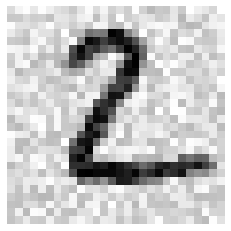

In [14]:
#Seeing the noisy data
some_index = 1
some_digit_image_noisy = X_test_mod[some_index].reshape(28,28)
plt.imshow(some_digit_image_noisy, cmap = "binary")
plt.axis("off")
plt.show()

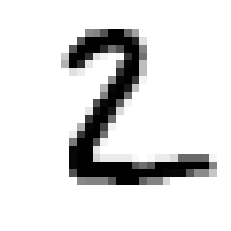

In [16]:
#Original data for same
some_digit_image_clean = X_test[some_index].reshape(28,28)
plt.imshow(some_digit_image_clean, cmap = "binary")
plt.axis("off")
plt.show()

In [13]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])


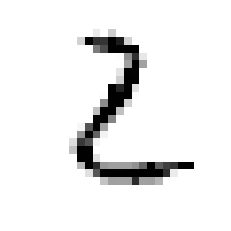

In [17]:
#Predicted by Multiputput classifier and making the image clean
plt.imshow(clean_digit.reshape(28,28), cmap = "binary")
plt.axis("off")
plt.show()